In [4]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Generation data for Southern Norway

%store -r CorrNO2
%store -r NO2Gen

CorrNO2

,Generation,Max. Value,rho,p,m,c,a,b
0,Hydro,209428.0,-0.19844,6.436587e-08,NaN,NaN,-0.003564,164.196461


     Hydro Predicted [EUR/MWh]
0                        88.93
1                        88.21
2                        91.40
3                        86.80
4                        83.72
..                         ...
725                     119.10
726                     125.94
727                     134.91
728                     132.71
729                     131.90

[730 rows x 1 columns]


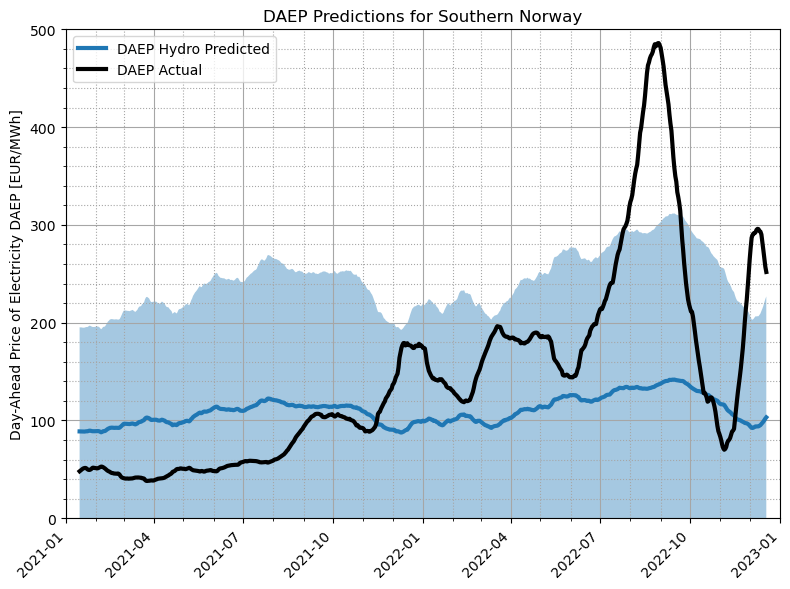

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

plt.title('DAEP Predictions for Southern Norway')
plt.ylabel('Day-Ahead Price of Electricity DAEP [EUR/MWh]')

#ax.plot(NO2Gen["Date"], NO2Gen["NO2 DAEP [EUR/MWh]"], color = "darkred")
#plt.fill_between(NO2Gen["Date"], NO2Gen["NO2 DAEP [EUR/MWh]"], color="darkred")

c = pd.DataFrame(["blue", "lightblue", "green", "aquamarine", "orange", "moccasin"])

DAEPwei = pd.DataFrame()
CorrNO2 = CorrNO2.replace(np.NaN, "N/A")

for i in range(0, len(CorrNO2.iloc[:,0])):
    Name = CorrNO2.iloc[i,0]
    Gen = NO2Gen[f"{Name} [MWh]"]
    
    d = CorrNO2.iloc[i,1]
    
    if d > 1000000:
        Gen = Gen/1000000
    if 1000000 > d > 1000:
        Gen = Gen/1000
        
    rho = CorrNO2.iloc[i,2]
    
    if CorrNO2.iloc[i,6] == "N/A":
        m = CorrNO2.iloc[i,4]
        c = CorrNO2.iloc[i,5]
        DAEPwei[f"{Name} Predicted [EUR/MWh]"] = m*Gen + c
    if CorrNO2.iloc[i,4] == "N/A":
        a = CorrNO2.iloc[i,6]
        b = CorrNO2.iloc[i,7]
        DAEPwei[f"{Name} Predicted [EUR/MWh]"] = b*np.exp(a*Gen)
    
    plt.fill_between(NO2Gen["Date"], (rho)*DAEPwei[f"{Name} Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
                 (2-rho)*DAEPwei[f"{Name} Predicted [EUR/MWh]"].rolling(28,  center=True).mean(), alpha=0.4)
    ax.plot(NO2Gen["Date"], DAEPwei[f"{Name} Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
            linewidth=3, label = f"DAEP {Name} Predicted")
    
print(DAEPwei.round(2))

#DAEPwei["SAP Predicted [EUR/MWh]"] = MSAP*CompGasNO2["NO2 Gas SAP [EUR/MWh]"].astype(float)+CSAP
#plt.fill_between(NO2Gen["Date"], (rhoSAP_BZNNO2)*DAEPwei["SAP Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
#                 (2-rhoSAP_BZNNO2)*DAEPwei["SAP Predicted [EUR/MWh]"].rolling(28,  center=True).mean(), alpha=0.4)
#ax.plot(NO2Gen["Date"], DAEPwei["SAP Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
#        linewidth=3, color="red", label = "DAEP SAP Predicted")


ax.plot(NO2Gen["Date"], NO2Gen["NO2 DAEP [EUR/MWh]"].rolling(28,  center=True).mean(),
        linewidth=3, color = "black", label="DAEP Actual")

plt.legend()

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 500)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [6]:
print(DAEPwei)

     Hydro Predicted [EUR/MWh]
0                    88.926035
1                    88.208313
2                    91.398988
3                    86.801953
4                    83.715949
..                         ...
725                 119.101345
726                 125.936080
727                 134.908367
728                 132.710611
729                 131.901061

[730 rows x 1 columns]
